In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Session 02

## Supervised ML Algos

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


In [6]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [4]:
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [10]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

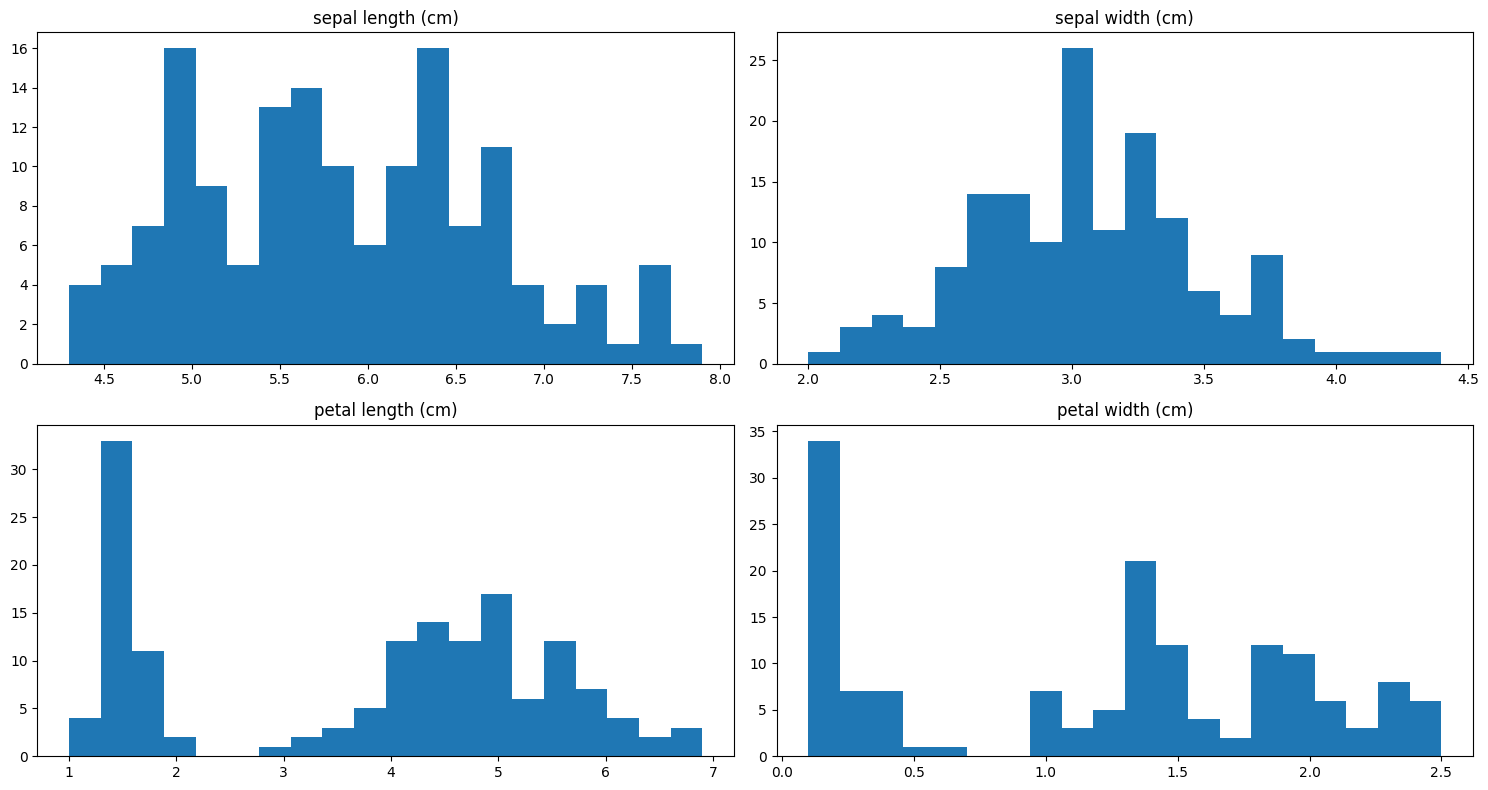

In [18]:
plt.figure(figsize = (15, 8))

for count in range(X.shape[1]):
    
    plt.subplot(2,2,count+1)

    n, bins, patches = plt.hist(X[:,count], 20)

    plt.title (iris.feature_names[count])

plt.tight_layout()

In [20]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X, y)

y_pred = clf.predict(X)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

In [23]:
xplot = X[:, 0]
yplot = X[:, 1]

x_err = xplot[(y != y_pred)]
y_err = yplot[(y != y_pred)]
x_err.shape, y_err.shape

((6,), (6,))

In [30]:
target_names = iris.target_names

formatter = plt.FuncFormatter(lambda i, *arg: target_names[int(i)])

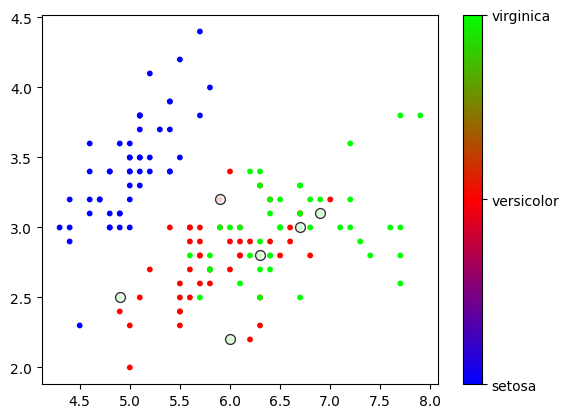

In [35]:
plt.scatter(xplot, yplot, s = 10, c = y, cmap=plt.cm.brg);

plt.colorbar(ticks= [0,1,2], format = formatter)
plt.scatter(x_err, y_err, s = 50, color = 'w', edgecolors='black', alpha = 0.8);

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= TEST_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,6))
i = 0
for k in ['linear', 'rbf', 'poly']:
    clf = SVC(kernel = k)
    clf.fit(X_train, y_train)
    y_pred  = clf.predict(X_test)
    print (f'Kernel: {k}: - Acc:{accuracy_score(y_test, y_pred): .4}', end = ' ')
    print (f' - F1:{f1_score(y_test, y_pred, average="weighted"):0.4f}')
    cm = confusion_matrix(y_test, y_pred)
    #print (cm)
    #print ('-'*50)
    ax = axes[i]
    ax.set_title(k)
    i = i+1
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=digits.target_names
                                 )
    disp.plot(ax =ax, cmap = plt.cm.Blues, colorbar=False)
    

In [6]:
## Basic Parameters

inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)


In [7]:
moduleDir = 'machine_learning'

data_df = pd.read_csv(os.path.join(inpDir, moduleDir, 'StudentsPerformance.csv'))
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
for col in data_df.columns:
    print (f'{col}: {data_df[col].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

In [11]:
data_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

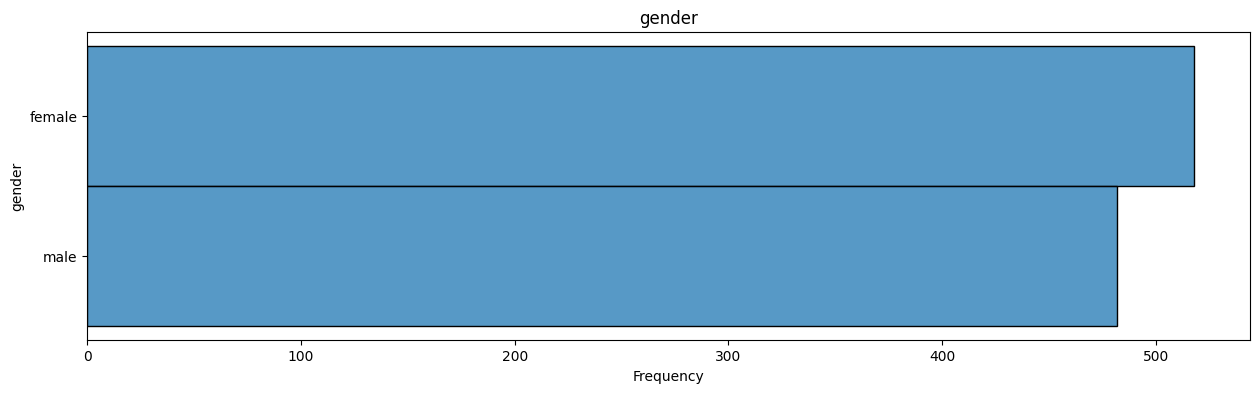

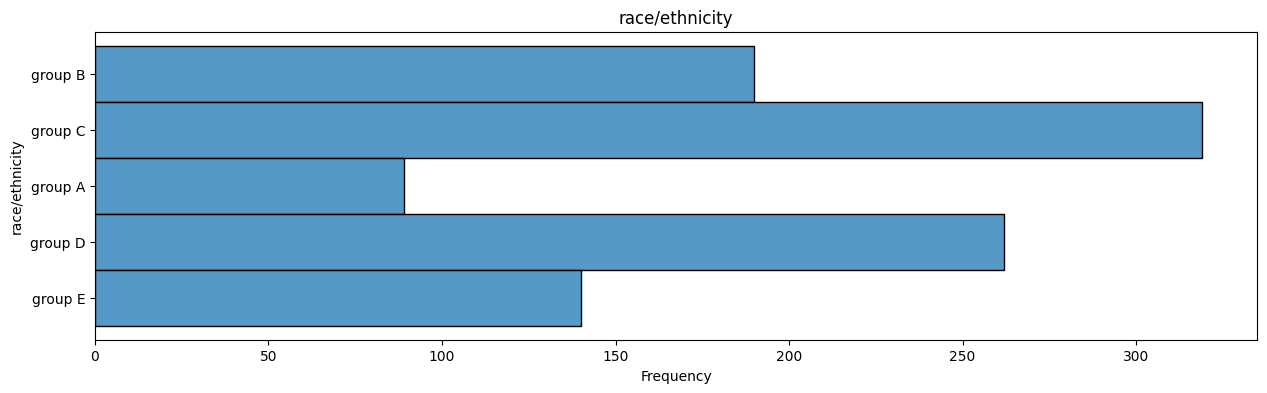

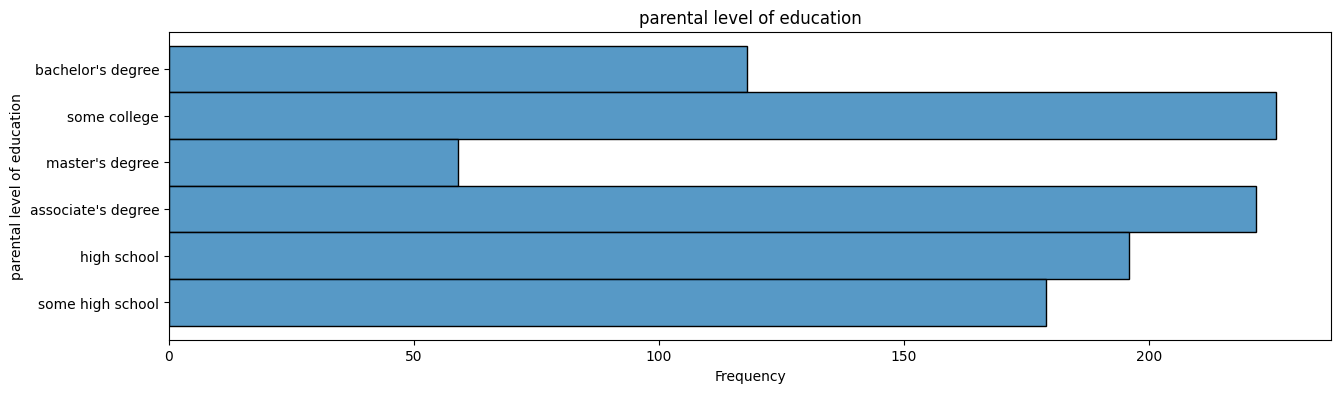

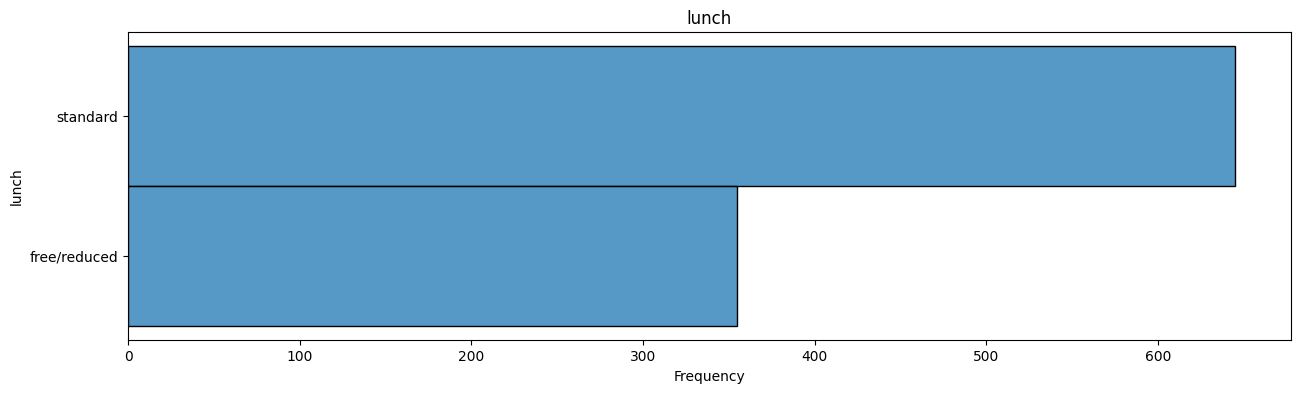

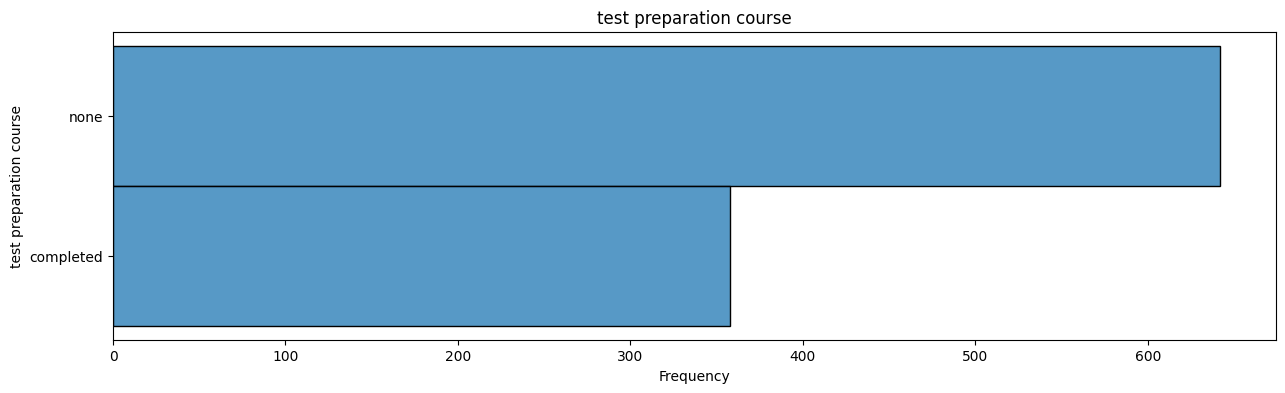

In [12]:
import seaborn as sns

cat_cols = ['gender', 'race/ethnicity', 
            'parental level of education', 'lunch',
            'test preparation course']

for count, col in enumerate(cat_cols):
                           
    fig, ax = plt.subplots(figsize = (15, 4))
    
    colCount = data_df[col].value_counts()
        
    ax.set_title(col)
    
    ax.set_xlabel('Frequency')
    
    #sns.countplot(data_df, y = col, ax = ax)
    sns.histplot(data_df, y = col, ax = ax)

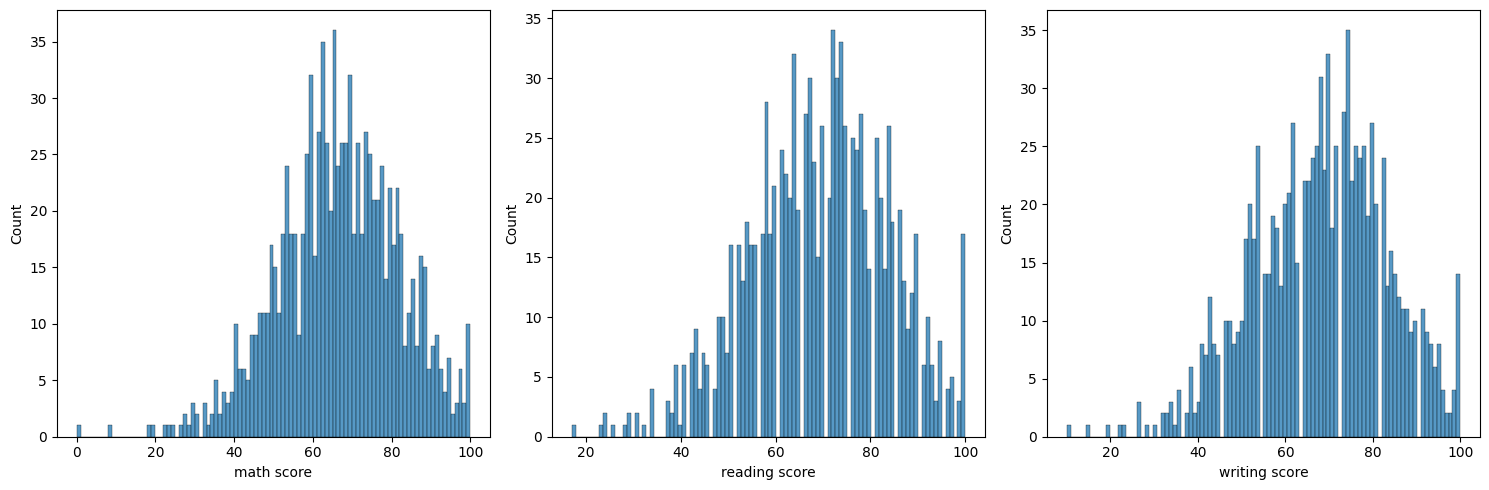

In [13]:
num_cols = ['math score', 'reading score', 'writing score']

fig, axes = plt.subplots(1,3, figsize=(15, 5))

for count, col in enumerate(num_cols):
    
    ax =axes[count]
    
    sns.histplot(data_df, x = col, ax = ax, bins = 100)

plt.tight_layout()

In [14]:
data_df[['gender', 'math score']].groupby(['gender'], as_index = False).mean()

,gender,math score
0,female,63.633205
1,male,68.728216


In [15]:
data_df[['gender', 'reading score']].groupby(['gender'], as_index = False).mean()

,gender,reading score
0,female,72.608108
1,male,65.473029


In [16]:
data_df[['gender', 'writing score']].groupby(['gender'], as_index = False).mean()

,gender,writing score
0,female,72.467181
1,male,63.311203


Plotting by Gender

<Axes: xlabel='gender'>

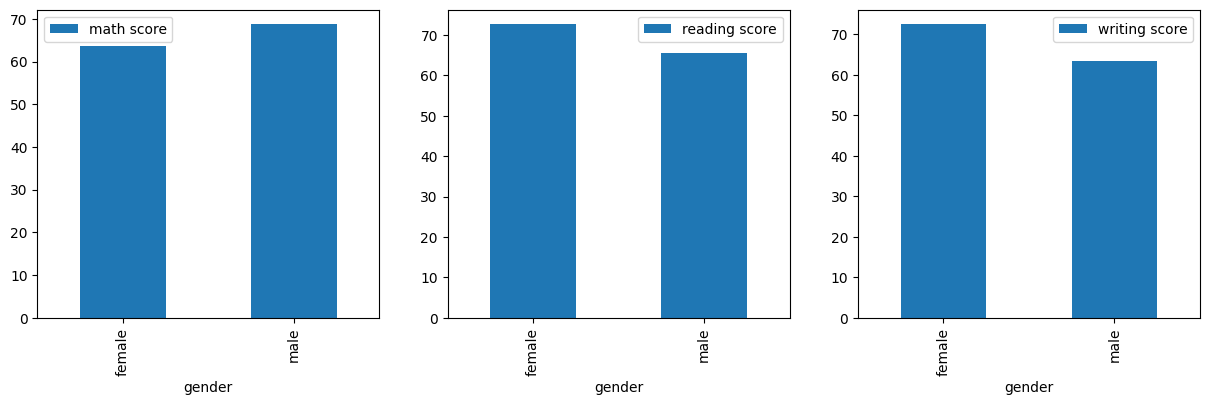

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[['gender', 
         'math score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                        ax = axes[0])


data_df[['gender', 
         'reading score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                        ax = axes[1])

data_df[['gender', 
         'writing score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                        ax = axes[2])

<Axes: xlabel='race/ethnicity'>

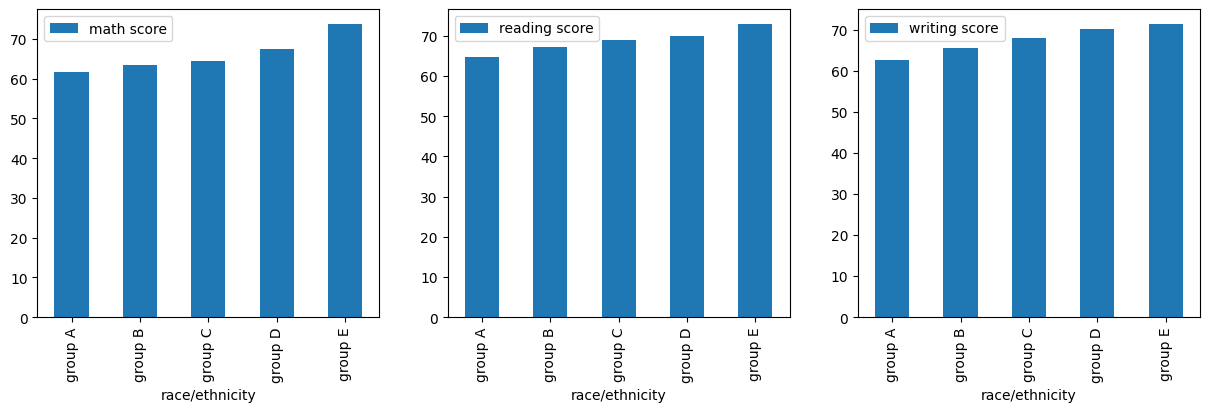

In [18]:
col = 'race/ethnicity'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[0])


data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[2])

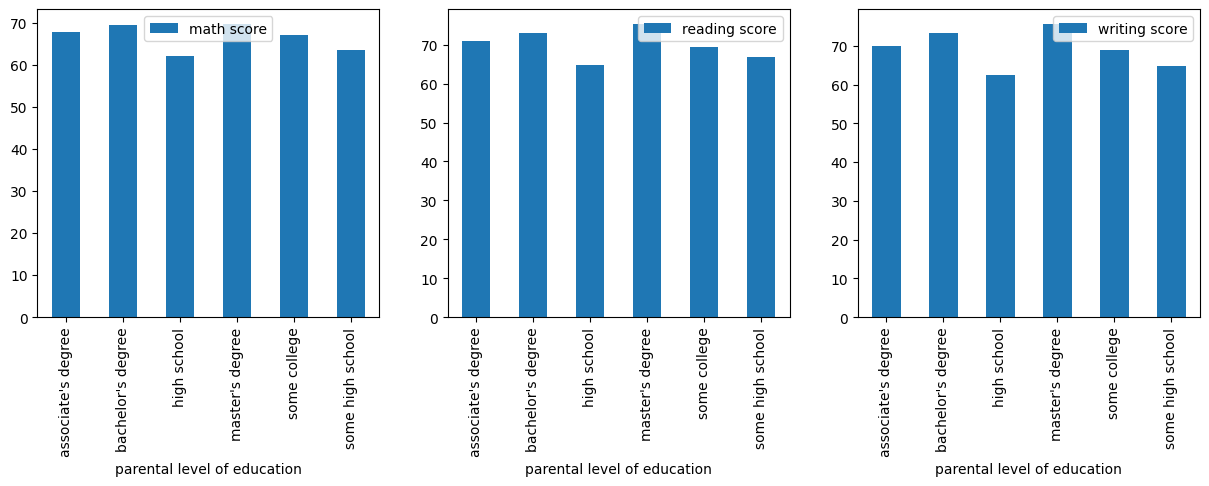

In [19]:
col = 'parental level of education'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[0])


data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[2]);

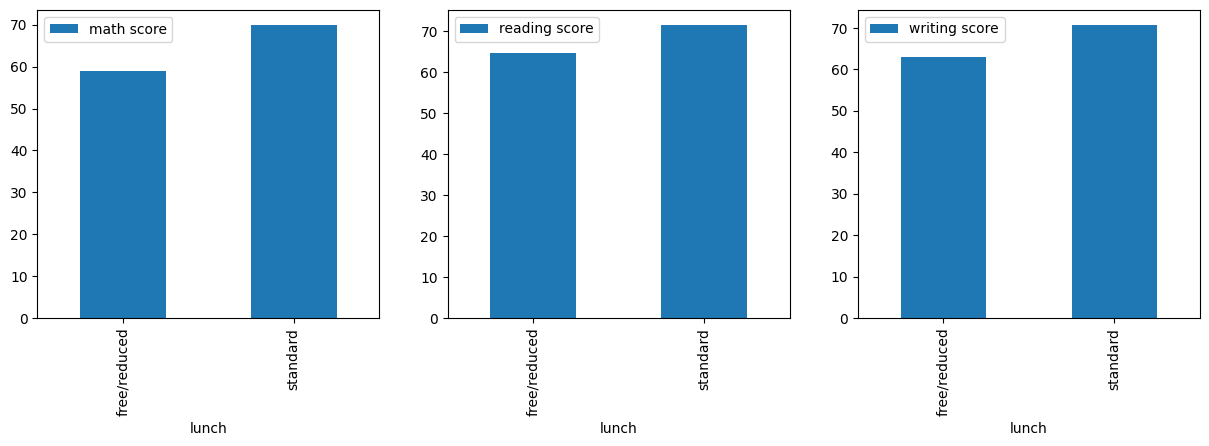

In [20]:
col = 'lunch'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[0])


data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[2]);

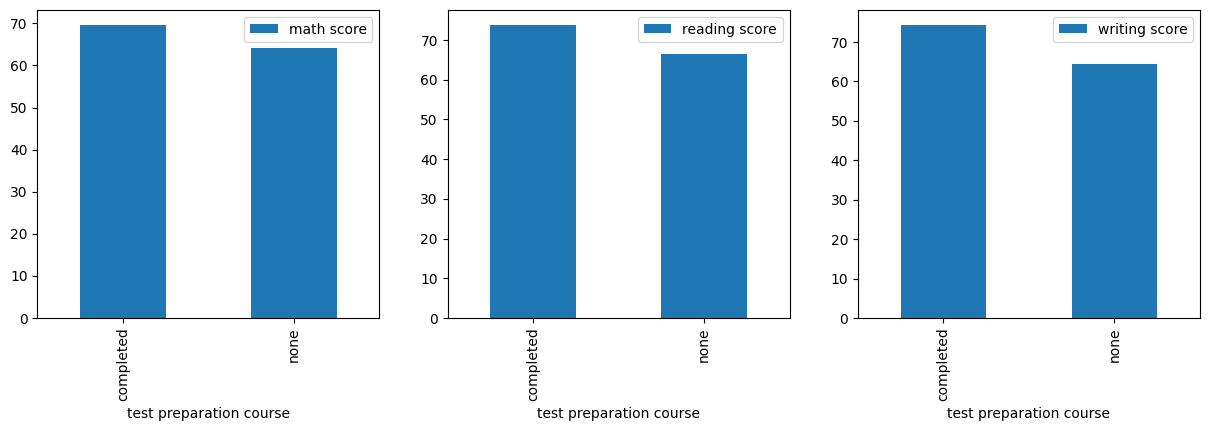

In [21]:
col = 'test preparation course'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[0])


data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[2]);

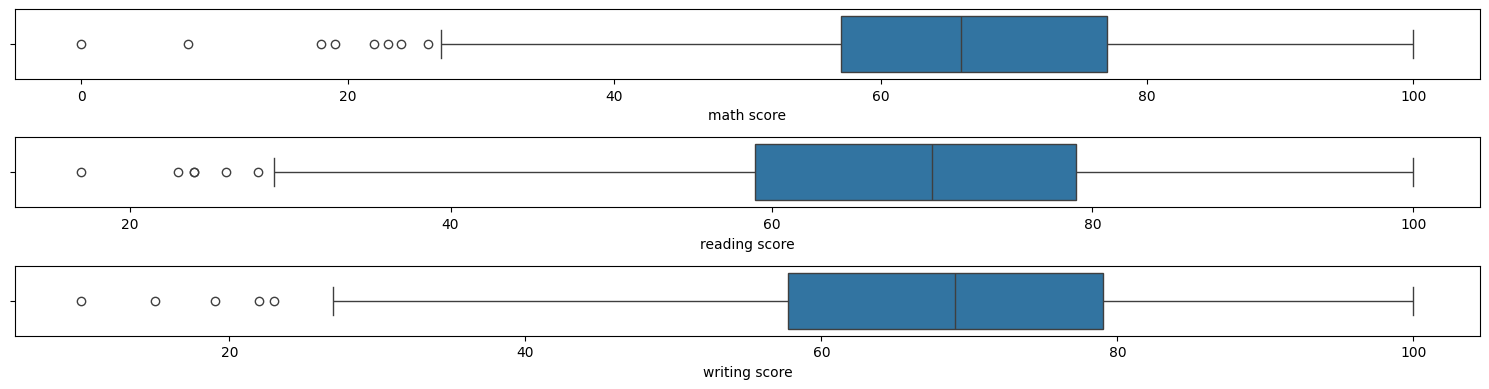

In [22]:
fig, axes = plt.subplots(3, 1, figsize = (15, 4))

sns.boxplot(data = data_df, x = 'math score', ax = axes[0])
sns.boxplot(data = data_df, x = 'reading score', ax = axes[1])
sns.boxplot(data = data_df, x = 'writing score', ax = axes[2])
plt.tight_layout()

In [23]:
Q1 = np.percentile(data_df['math score'], 25)

Q3 = np.percentile(data_df['math score'], 75)

outlier_dis = (Q3-Q1) *1.5
outlier_dis

30.0

In [24]:
outliers = data_df[data_df['math score'] < Q1 - outlier_dis].index
outliers

Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [25]:
from collections import Counter

outliers_list = []

outliers_list.extend( data_df[data_df['math score'] < Q1 - outlier_dis].index )

outliers_list.extend( data_df[data_df['reading score'] < Q1 - outlier_dis].index )

outliers_list.extend( data_df[data_df['writing score'] < Q1 - outlier_dis].index )

outlier_count = Counter(outliers_list)

outlier_count

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1})

In [26]:
data_df['overall'] = (data_df['math score'] +
                      data_df['reading score'] + 
                      data_df['writing score'])/ 3.0

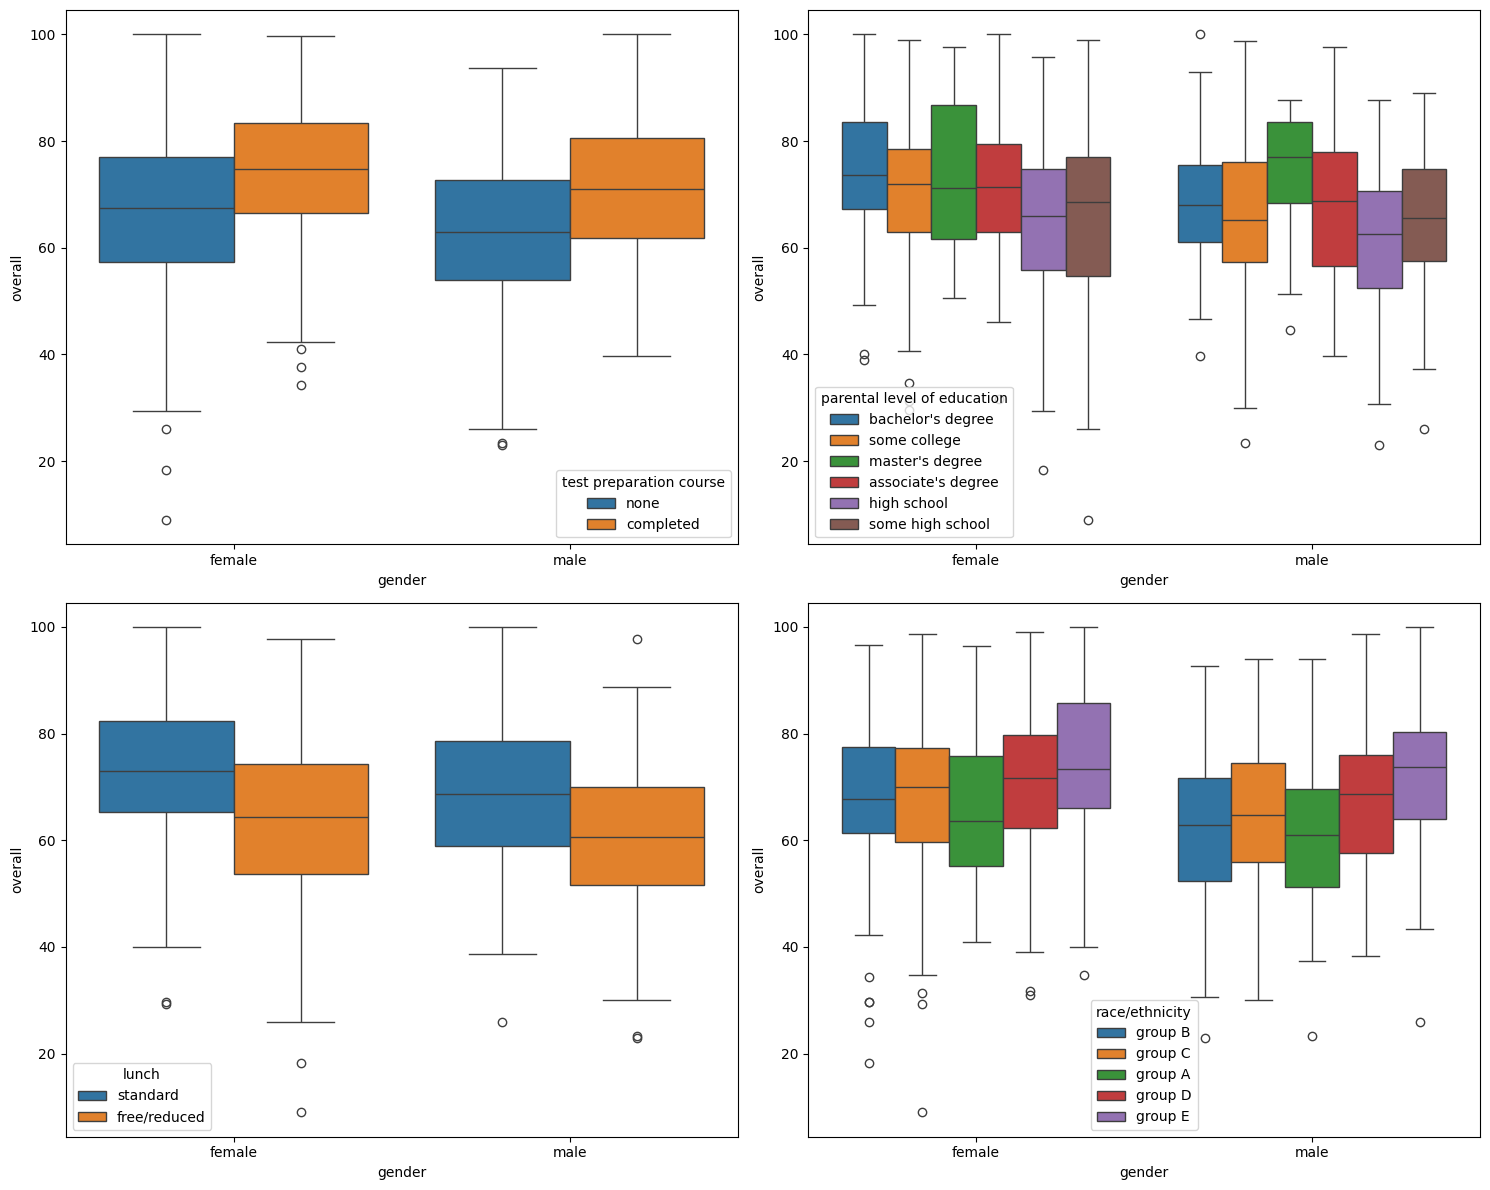

In [31]:
fig = plt.figure(figsize = ( 15, 12) )

ax = fig.add_subplot(221)

sns.boxplot(data = data_df, x = 'gender', hue = 'test preparation course', y = 'overall', ax = ax)

ax = fig.add_subplot(222)

sns.boxplot(data = data_df, x = 'gender', hue = 'parental level of education', y = 'overall', ax = ax)

ax = fig.add_subplot(223)

sns.boxplot(data = data_df, x = 'gender', hue = 'lunch', y = 'overall', ax = ax)

ax = fig.add_subplot(224)

sns.boxplot(data = data_df, x = 'gender', hue = 'race/ethnicity', y = 'overall', ax = ax)

plt.tight_layout();


In [33]:
data_df[num_cols].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


AttributeError: module 'seaborn' has no attribute 'vilonplot'

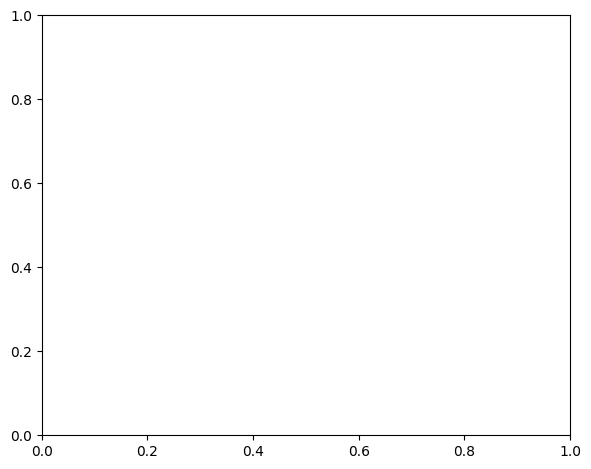

In [34]:
fig = plt.figure(figsize = ( 15, 12) )

ax = fig.add_subplot(221)

sns.voilonplot(data = data_df, x = 'gender', hue = 'test preparation course', y = 'overall', ax = ax)

ax = fig.add_subplot(222)

sns.vilonplot(data = data_df, x = 'gender', hue = 'parental level of education', y = 'overall', ax = ax)

ax = fig.add_subplot(223)

sns.vilonplot(data = data_df, x = 'gender', hue = 'lunch', y = 'overall', ax = ax)

ax = fig.add_subplot(224)

sns.vilonplot(data = data_df, x = 'gender', hue = 'race/ethnicity', y = 'overall', ax = ax)

plt.tight_layout();
